In [17]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline

# Sample rate conversion

In [18]:
fs = 20  # Original Sampling Frequency
T = 1  # Signal duration
L = 5/3  # Upsampling Factor

t = np.linspace(0, 1, 501)  # "Continuous-time" vector 
t_n = np.linspace(0, T, fs*T, endpoint=False)  # Sample times before upsampling
t_m = np.linspace(0, T, int(fs*L*T), endpoint=False)  # Sample times after upsampling

x = lambda t: np.sin(np.pi*6*t) + np.cos(np.pi*12*t) # The continuous-time signal x(t)

plt.close(1); 
fig, ax = plt.subplots(num=1)
ax.plot(t, x(t), ":", label="$x(t)$")
ax.stem(t_m, x(t_m), markerfmt="C1d", linefmt="C1", label="$x_{\\text{new}}[m]$", basefmt="grey")
ax.stem(t_n, x(t_n), markerfmt="x", label="$x_{\\text{old}}[n]$", basefmt="grey")
ax.set_xlim(xmax=1)
ax.set_yticklabels("")
ax.legend()
ax.set_xlabel("Time $t$ (seconds)")
plt.savefig("sample_rate_conversion.png")

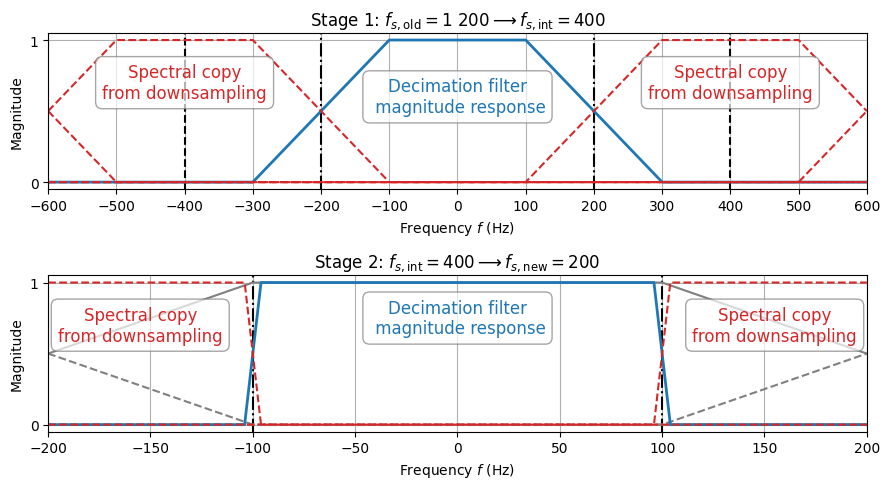

In [77]:
M1=3
M2=2
fs=1200


f = np.arange(-fs//2, fs//2+1)

def H1(f):
    return np.where(np.abs(f) <= 100, 1, np.where(np.abs(f) <= 300, 1 - (np.abs(f)-100)/200, 0))

plt.figure(figsize=(9, 5))
plt.subplot(2,1,1)
plt.axvline(200, 0, 1, linestyle="-.", color="black")
plt.axvline(-200, 0, 1, linestyle="-.", color="black")
plt.axvline(400, 0, 1, linestyle="--", color="black")
plt.axvline(-400, 0, 1, linestyle="--", color="black")
plt.plot(f, H1(f), "C0", linewidth=2)
plt.plot(f, H1(f-400), "C3--")
plt.plot(f, H1(f-800), "C3--")
plt.plot(f, H1(f+400), "C3--")
plt.plot(f, H1(f+800), "C3--")
plt.xticks(np.arange(-fs//2, fs//2+1, 100))
plt.title("Stage 1: $f_{s, \\text{old}} = 1\ 200 \\longrightarrow f_{s, \\text{int}} = 400 $")
plt.yticks([0, 1])
plt.xlabel("Frequency $f$ (Hz)")
plt.ylabel("Magnitude")
plt.text(
    -400, 0.7,
    "Spectral copy\nfrom downsampling",
    ha='center', va='center',
    fontsize=12, 
    color='C3',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)
plt.text(
    400, 0.7,
    "Spectral copy\nfrom downsampling",
    ha='center', va='center',
    fontsize=12, 
    color='C3',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)
plt.text(
    0, 0.6,
    "Decimation filter\n magnitude response",
    ha='center', va='center',
    fontsize=12, 
    color='C0',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)



fs = fs/M1
f = np.arange(-fs//2, fs//2+1)
def H2(f):
    return np.where(np.abs(f) <= 96, 1, np.where(np.abs(f) <= 104, 1 - (np.abs(f)-96)/8, 0))
plt.subplot(2,1,2)
plt.axvline(100, 0, 1, linestyle="-.", color="black")
plt.axvline(-100, 0, 1, linestyle="-.", color="black")
plt.plot(f, H1(f), color="grey", linestyle="-")
plt.plot(f, H1(f-400), color="grey", linestyle="--")
plt.plot(f, H1(f+400), color="grey", linestyle="--")
plt.plot(f, H2(f), linewidth=2)
plt.plot(f, H2(f-200), "C3--")
plt.plot(f, H2(f+200), "C3--")

plt.yticks([0, 1]);
plt.xticks(np.arange(-fs//2, fs//2+1, 50))
plt.title("Stage 2: $f_{s, \\text{int}} = 400 \\longrightarrow f_{s, \\text{new}} = 200 $")
plt.xlabel("Frequency $f$ (Hz)")
plt.ylabel("Magnitude")
plt.text(
    -155, 0.7,
    "Spectral copy\nfrom downsampling",
    ha='center', va='center',
    fontsize=12, 
    color='C3',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)
plt.text(
    155, 0.7,
    "Spectral copy\nfrom downsampling",
    ha='center', va='center',
    fontsize=12, 
    color='C3',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)
plt.text(
    0, 0.75,
    "Decimation filter\n magnitude response",
    ha='center', va='center',
    fontsize=12, 
    color='C0',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=0.4')
)
plt.tight_layout()
plt.savefig("multistage_filtering.png")
plt.show()

# Circuit Diagrams

In [7]:
%load_ext jupyter_tikz

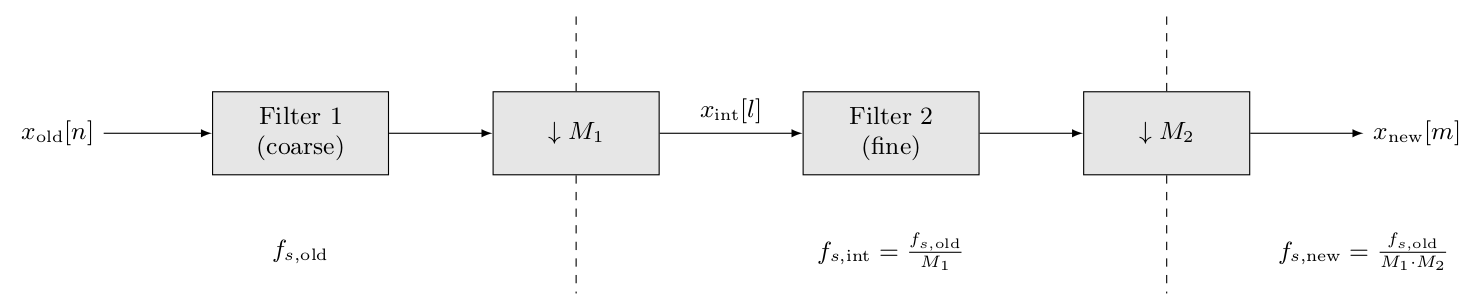

In [32]:
%%tikz -p=\include{prefix.tex} -sc=1 --dpi=200 -r -S multistage.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, text width=2cm, align=center](filt){Filter 1 \\ (coarse)};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow M_1$};
    \node[block, right of=deci, xshift=1.5cm, text width=2cm, align=center](filt2){Filter 2 \\ (fine)};
	\node[block, right of=filt2, xshift=1cm](deci2){$\downarrow M_2$};
	\node[output, right of=deci2] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci) {};
    \draw[->] (deci.east)--(filt2.west)node[midway](fs1){$x_{\text{int}}[l]$};
    \draw[->] (filt2) -- (deci2) ;
   	\draw[->] (deci2) --(out) node[midway](fs2){} node[right]{$x_{\text{new}}[m]$};

    \draw[dashed] (deci.north) -- ($(deci.north) + (0, 1)$);
    \draw[dashed] (deci.south) -- ($(deci.south) + (0, -1.5)$);
    \draw[dashed] (deci2.north) -- ($(deci2.north) + (0, 1)$);
    \draw[dashed] (deci2.south) -- ($(deci2.south) + (0, -1.5)$);
    %\draw[dashed] ($(fs1)+(-.8,1)$) -- ($(fs1)+(-.8,-2)$);
    \node [below of=filt, node distance=15mm] {$f_{s, \text{old}}$};
    %\draw[dashed] ($(fs2)+(-.6,1)$) -- ($(fs2)+(-.6,-2)$);
    \node [below of=filt2, node distance=15mm] {$f_{s,\text{int}} = \frac{f_{s, \text{old}}}{M_1}$};
    \node [below of=out, node distance=15mm] {$f_{s, \text{new}} = \frac{f_{s, \text{old}}}{M_1\cdot M_2}$};
\end{tikzpicture}

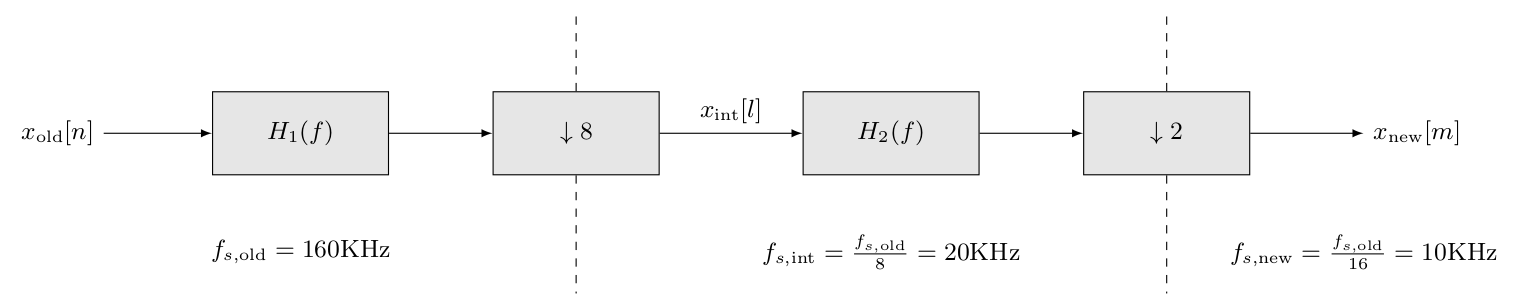

In [84]:
%%tikz -p=\include{prefix.tex} -sc=1 --dpi=200 -r -S multistage_assignment_10.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, text width=2cm, align=center](filt){$H_1(f)$};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow 8$};
    \node[block, right of=deci, xshift=1.5cm, text width=2cm, align=center](filt2){$H_2(f)$};
	\node[block, right of=filt2, xshift=1cm](deci2){$\downarrow 2$};
	\node[output, right of=deci2] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci) {};
    \draw[->] (deci.east)--(filt2.west)node[midway](fs1){$x_{\text{int}}[l]$};
    \draw[->] (filt2) -- (deci2) ;
   	\draw[->] (deci2) --(out) node[midway](fs2){} node[right]{$x_{\text{new}}[m]$};

    \draw[dashed] (deci.north) -- ($(deci.north) + (0, 1)$);
    \draw[dashed] (deci.south) -- ($(deci.south) + (0, -1.5)$);
    \draw[dashed] (deci2.north) -- ($(deci2.north) + (0, 1)$);
    \draw[dashed] (deci2.south) -- ($(deci2.south) + (0, -1.5)$);
    %\draw[dashed] ($(fs1)+(-.8,1)$) -- ($(fs1)+(-.8,-2)$);
    \node [below of=filt, node distance=15mm] {$f_{s, \text{old}}=160\text{KHz}$};
    %\draw[dashed] ($(fs2)+(-.6,1)$) -- ($(fs2)+(-.6,-2)$);
    \node [below of=filt2, node distance=15mm] {$f_{s,\text{int}} = \frac{f_{s, \text{old}}}{8}=20\text{KHz}$};
    \node [below of=out, node distance=15mm] {$f_{s, \text{new}} = \frac{f_{s, \text{old}}}{16}=10\text{KHz}$};
\end{tikzpicture}

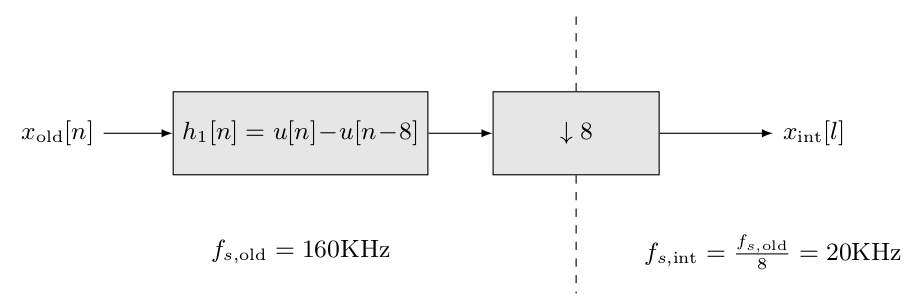

In [16]:
%%tikz -p=\include{prefix.tex} -sc=1 --dpi=200 -r -S stage_1.png
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, text width=3cm, align=center](filt){$h_1[n] = u[n] - u[n-8]$};
	\node[block, right of=filt, xshift=1cm](deci){$\downarrow 8$};
	\node[output, right of=deci] (out){};
	
	% lines
	\draw[->] (in) node[left]{$x_{\text{old}}[n]$}--(filt.west){};
    \draw[->] (filt) -- (deci) {};
   	\draw[->] (deci) --(out) node[midway](fs2){} node[right]{$x_{\text{int}}[l]$};

    \draw[dashed] (deci.north) -- ($(deci.north) + (0, 1)$);
    \draw[dashed] (deci.south) -- ($(deci.south) + (0, -1.5)$);
    \node [below of=filt, node distance=15mm] {$f_{s, \text{old}} = 160 \text{KHz}$};
    \node [below of=out, node distance=15mm] {$f_{s,\text{int}} = \frac{f_{s, \text{old}}}{8} = 20 \text{KHz}$};
\end{tikzpicture}